In [1]:
# Importando Bibliotecas y conjunto de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# Arboles de Decision

El primer clasificador que me viene a la mente es un modelo de clasificación discriminativo llamado árboles de clasificación (lea más [aquí](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)). La razón es que podemos ver las reglas de clasificación y es fácil de interpretar.

Construyamos uno usando sklearn (Si gusta puede revisar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)), con una profundidad máxima de 3, y podemos verificar su precisión en los datos de prueba:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
irisPanda = pd.DataFrame(iris.data,columns = iris.feature_names)
irisPanda['Species'] = iris.target
irisPanda

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
irisPanda.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
irisPanda.groupby('Species').size()

Species
0    50
1    50
2    50
dtype: int64

In [6]:
train, test = train_test_split(irisPanda, test_size = 0.4, stratify = irisPanda['Species'], random_state = 42)

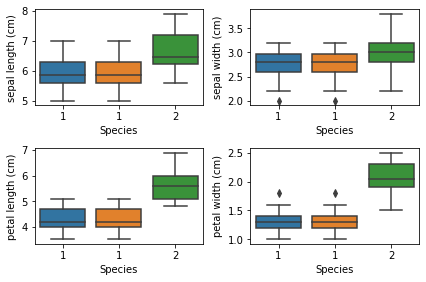

In [7]:
fig, axs = plt.subplots(2, 2)

fn = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
cn = [1, 1, 2]
sns.boxplot(x = 'Species', y = 'sepal length (cm)', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'sepal width (cm)', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'petal length (cm)', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'petal width (cm)', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

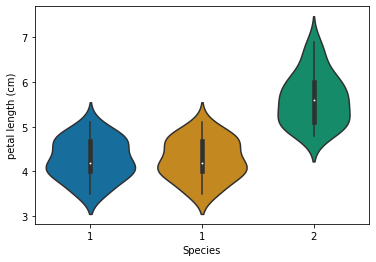

In [8]:
sns.violinplot(x="Species", y="petal length (cm)", data=train, size=5, order = cn, palette = 'colorblind');

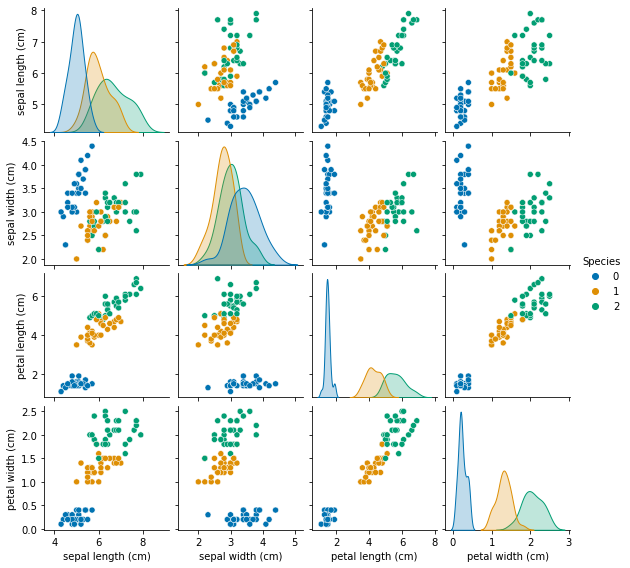

In [9]:
sns.pairplot(train, hue="Species", height = 2, palette = 'colorblind');

## Ahora si, el arbol

In [10]:

X_train = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_train = train.Species
X_test = test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_test = test.Species

In [11]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [12]:
irisPanda['species'] = str(irisPanda['Species'])

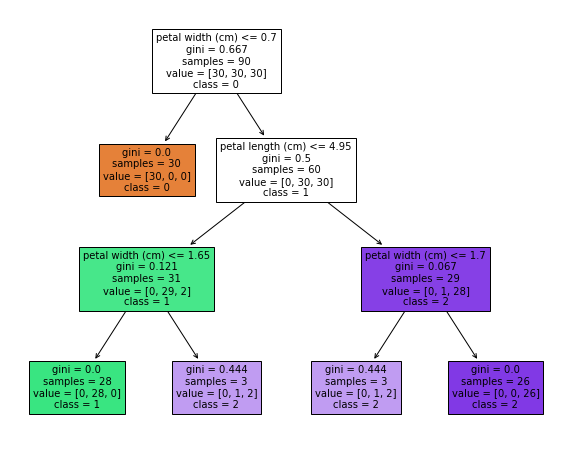

In [13]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], class_names = ['0','1','2'], filled = True);

/home/tom/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


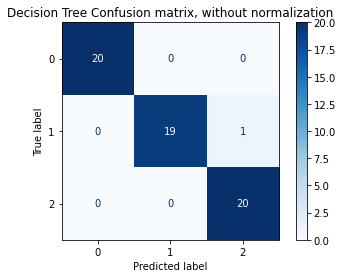

In [14]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=[0,1,2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [15]:
y_pred = mod_dt.predict(X_test)
confMat = metrics.confusion_matrix(y_test,y_pred)
confMat

array([[20,  0,  0],
       [ 0, 19,  1],
       [ 0,  0, 20]])

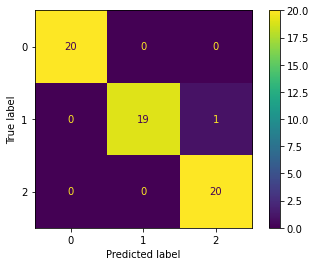

In [16]:

metrics.ConfusionMatrixDisplay(confusion_matrix = confMat,
                                                display_labels=[0,1,2]).plot()

## Otra Base - RANDOM FOREST

In [17]:
from sklearn.datasets import load_boston

In [18]:
california = load_boston()
california.feature_names

/home/tom/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
datos = np.column_stack((california.data, california.target))
datos = pd.DataFrame(datos,columns = np.append(california.feature_names, "MEDV"))
datos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [20]:
datos.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
datos['ClassMEDV'] = datos['MEDV']>22
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = ["MEDV","ClassMEDV"]),
                                        datos['MEDV'],
                                        random_state = 123
                                    )
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=123)

In [22]:


# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 4.358493834335092


/home/tom/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/tom/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/tom/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Valor óptimo de n_estimators: 56


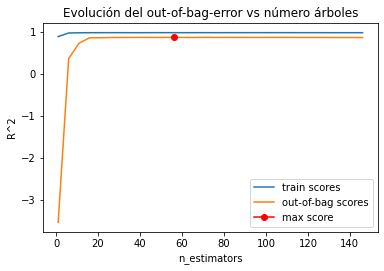

In [23]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1.0,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

In [24]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = ["MEDV",'ClassMEDV']).columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,RM,0.532955
12,LSTAT,0.303276
7,DIS,0.053274
0,CRIM,0.031144
4,NOX,0.019992
9,TAX,0.014851
6,AGE,0.011930
10,PTRATIO,0.011633
11,B,0.009304
2,INDUS,0.005419


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = ["MEDV","ClassMEDV"]),
                                        datos['ClassMEDV'],
                                        random_state = 123
                                    )
# Creación del modelo
# ==============================================================================
modelo1 = RandomForestClassifier(
            n_estimators = 10,
            criterion    = 'log_loss',
            max_depth    = None,
            max_features = 1.0,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo1.fit(X_train, y_train)

/home/tom/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='log_loss', max_features=1.0, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=123)

In [26]:
modelo1.oob_score_

0.8443271767810027

In [29]:
# arbol unico de decision
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.843


In [28]:
prediccionClass = modelo1.predict(X_test)
metrics.accuracy_score(y_test,prediccionClass)

0.8661417322834646

Como vemos mejora 2% la prediccion